In [1]:
%matplotlib inline

In [43]:
import os
import numpy as np
from matplotlib import pyplot as plt
from auren.core import io
from auren.core import signal_processing_utils as spu

def todB(a):
    return 20 * np.log10(np.abs(a))

In [7]:
figkwargs = dict(figsize=(6.5, 4), dpi=300)

In [4]:
data_folder = "2024-10-14_AurenV1.2_acousticBlackHoleTest"
path = os.path.join("Olympus", "Projects", "1010564-OPEN-HEARING", "Technical Work", "Testing", "Data", data_folder)  # From windows
if os.environ.get("OLYMPUS_PROJECTS_PATH", False):
    path = path.replace(os.path.join('Olympus', "Projects"), os.environ.get("OLYMPUS_PROJECTS_PATH"))
print("Looking for data in this path:", path)

Looking for data in this path: /mnt/o/1010564-OPEN-HEARING/Technical Work/Testing/Data/2024-10-14_AurenV1.2_acousticBlackHoleTest


In [5]:
lack_abh = io.load_wav(os.path.join(path, "AUDIO015.WAV"))
with_abh = io.load_wav(os.path.join(path, "AUDIO016.WAV"))

Couldn't read file using scipy, falling back to soundfile. This was the error  WAV header is invalid: nAvgBytesPerSec must equal product of nSamplesPerSec and nBlockAlign, but file has nSamplesPerSec = 96000, nBlockAlign = 8, and nAvgBytesPerSec = 192000
Couldn't read file using scipy, falling back to soundfile. This was the error  WAV header is invalid: nAvgBytesPerSec must equal product of nSamplesPerSec and nBlockAlign, but file has nSamplesPerSec = 96000, nBlockAlign = 8, and nAvgBytesPerSec = 192000


In [19]:
lack_f, lack_p = spu.to_fourier(lack_abh[1].T, lack_abh[2])
with_f, with_p = spu.to_fourier(with_abh[1].T, with_abh[2])


In [44]:
lack_p.shape, lack_abh[1].max()

((4, 261888), 0.13433837890625)

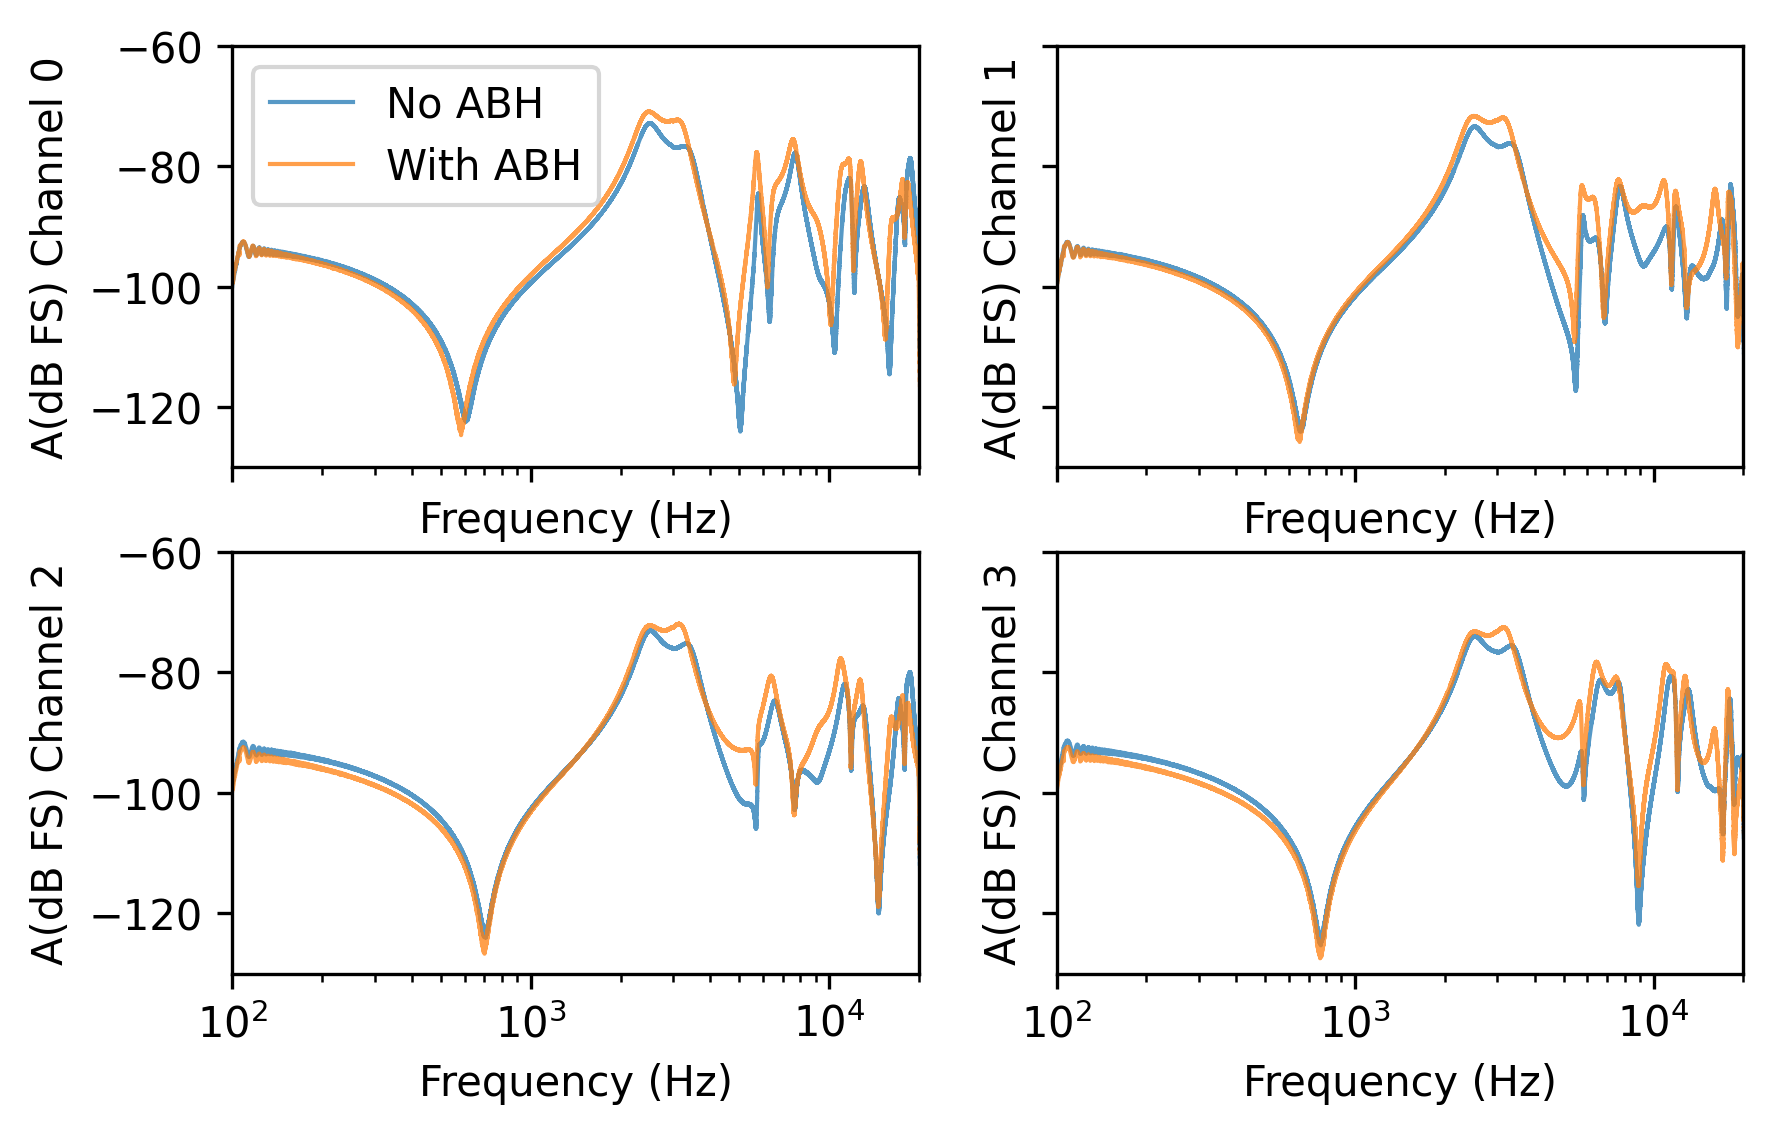

In [48]:
cl = 2
cw = 2
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, **figkwargs)
count = 0
for i in range(2):
    for j in range(2):
        axs[i, j].semilogx(lack_f, todB(lack_p[count]), label='No ABH', alpha=0.75, lw=1)
        axs[i, j].semilogx(with_f, todB(with_p[count]), label='With ABH', alpha=0.75, lw=1)
        if count == 0:
            axs[i, j].legend()
        axs[i, j].set_ylim([-130, -60])
        axs[i, j].set_xlim([100, 20000])
        axs[i, j].set_xlabel("Frequency (Hz)")
        axs[i, j].set_ylabel("A(dB FS) Channel %d" % count)
        count +=1 
